## Authors & References :
#### This notebook is created by :
* Federrico Hansen Budianto
* Denzel Elden Wijaya
* Reswara Anargya Dzakirullah


#### Dataset reference:
Realinho, Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict Students' Dropout and Academic Success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.


#### Additional reference:

## Table of Contents :
1. [Problem Introduction](#section-1)
2. [Data Preparation and Data Analysis](#section-2)
3. [Exploratory Data Analysis (EDA)](#section-3)
4. [Model using Machine Learning](#section-4)
5. [Rethinking the Model](#section-5)
6. [Evaluation of the Predictions](#section-6)
7. [Conclusion and Implementation](#section-7)

## Problem Introduction 
<a id=section-1></a>
The universal right to quality education is acknowledged globally, prompting governments to prioritize the enrollment and successful completion of schooling for all children. Nevertheless, dropout rates appear as a significant obstacle, affected by various factors, such as diverse social, economic, and demographic factors. Recognizing this challenge, we need to make thorough analysis fixing this problem, even better in the early stages of undergraduate programs. This analysis aims to uncover the root causes and pinpoint at-risk populations, enabling the development of tailored strategies to effectively minimize dropout rates and strategizing a pre-program for undergraduate students, so they will be ensured that the education in the university is well-programmed.

In this notebook, utilizing “Predict Students’ Dropout and Academic Success. UCI Machine Learning Repository”, provided by Realinho, Valentim, Vieira Martins, Mónica, Machado, Jorge, and Baptista, Luís (2021) in UCI, we will present an in-depth analysis of student dropout in school education

#### Project Overview

The main goal of this project is to conduct a thorough examination and prediction of student dropout rates in school education, focusing particularly on undergraduate students, using the dataset "Predict Students' Dropout". Despite potential limitations such as the absence of school, area, or caste data, we aim to extract valuable insights from the dataset's existing attributes.

Our analysis aims to shed light on several key factors, that we will filter later:

1. **Demographic Analysis**: We will investigate how demographic factors like gender, age at enrollment, marital status, and nationality correlate with dropout rates.

2. **Economic Factors**: We'll explore the impact of economic factors such as parental occupation, tuition fee payment status, and eligibility for scholarships on dropout rates. Furthermore, we also analyze some other indicators such as unemployment rate, inflation rate, and GDP growth and dropout rates, considering their indirect effects on education outcomes.

3. **Academic Performance**: We'll analyze how students' academic performance, including curricular units and evaluations, influences their likelihood of dropping out.

4. **Social and Special Needs**: We'll examine whether students with educational special needs or facing unique challenges like displacement or debt are more prone to dropping out.

The anticipated outcome is to provide valuable insights into the multifaceted factors affecting student dropout. By pinpointing high-risk groups and understanding the nuanced contributors to dropout rates, the school can design targeted interventions and policies to enhance student retention and cultivate an environment conducive to learning.

In subsequent sections of this notebook, we will delve into data preprocessing, exploratory data analysis, and the development of predictive models to aid in dropout analysis. Despite potential data limitations, we aim to contribute to the school’s efforts in safeguarding every student’s right to education and mitigating dropout rates wherever feasible.

#### Questions and Objectives :
1. Can we actually predict the chance of a particular undergraduate students being dropped out?
2. Is it true the myth that says parental background greatly influences a child's education?
3. Which of the model is the best fit for our prediction?

These are some data desription that we will analyze for further models building.

**Columns:**

| **Column Name**                     | **Description**                                                                                         |
|---------------------------------|-----------------------------------------------------------------------------------------------------|
| Marital status                  | The marital status of the student. (Categorical)                                                     |
| Application mode                | The method of application used by the student. (Categorical)                                         |
| Application order               | The order in which the student applied. (Numerical)                                                  |
| Course                          | The course taken by the student. (Categorical)                                                       |
| Daytime/evening attendance      | Whether the student attends classes during the day or in the evening. (Categorical)                 |
| Previous qualification          | The qualification obtained by the student before enrolling in higher education. (Categorical)       |
| Nationality                     | The nationality of the student. (Categorical)                                                         |
| Mother's qualification          | The qualification of the student's mother. (Categorical)                                              |
| Father's qualification          | The qualification of the student's father. (Categorical)                                              |
| Mother's occupation             | The occupation of the student's mother. (Categorical)                                                 |
| Father's occupation             | The occupation of the student's father. (Categorical)                                                 |
| Displaced                       | Whether the student is a displaced person. (Categorical)                                             |
| Educational special needs       | Whether the student has any special educational needs. (Categorical)                                 |
| Debtor                          | Whether the student is a debtor. (Categorical)                                                       |
| Tuition fees up to date         | Whether the student's tuition fees are up to date. (Categorical)                                      |
| Gender                          | The gender of the student. (Categorical)                                                               |
| Scholarship holder              | Whether the student is a scholarship holder. (Categorical)                                            |
| Age at enrollment               | The age of the student at the time of enrollment. (Numerical)                                         |
| International                   | Whether the student is an international student. (Categorical)                                        |
| Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical)       |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical)       |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical)   |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical)     |


## Data Preparation
<a id=section-2></a>

In [42]:
# Importing essential libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn)

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Loading the dataset and displaying the first few rows to understand the structure and type of data available

data = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/data.csv', delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [44]:
#Renaming the column 'Nacionality' to 'Nationality' and 'Target' to 'Student Status'

data.rename(columns = {'Nacionality':'Nationality', 'Target': 'Student Status'}, inplace = True)

Let's check the shape of the datasets and we can see the features that we have mentioned above:

In [45]:
data.shape # Reviewing the dataset's dimensions (total number of rows and columns)

(4424, 37)

In [46]:
#Displaying a summary of each column's data type and non-null values in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Now we are going to check the existence of null value, na value and duplicate values in the datasets: 

In [47]:
# Identifying null values in the dataset
print("Number of null values per column:\n", data.isnull().sum()) 

Number of null values per column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder           

In [48]:
# Identifying missing values in the dataset
print("Number of missing values per column:\n", data.isna().sum()) 

Number of missing values per column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder        

In [49]:
# Identifying duplicate values in the dataset
print("Number of duplicate values: ", data.duplicated().sum()) 

Number of duplicate values:  0


Surprisingly, we do not have any null value, na value, or duplicated value in any columns in the datasets. Thus, we can go through the analyzing corrrelation process directly. But, then we also realize that 'Student Status' that we want to predict is in still in non-numeric form, thus to ease us, we need to encode the target value, since it is still in the non-numeric value

#### Encoding Categorical Variables
This conversion enables the model to interpret these variables, make a nuanced analysis and better predictive performance.

In [50]:
#Visualizing 'Student Status' non-numeric fields in the dataset
print(data["Student Status"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [51]:
# Transforming 'Student Status' values into numerical format, making them interpretable by machine learning algorithms

data['Student Status'] = data['Student Status'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [52]:
df = data.copy()

In [53]:
# Enumerating the 'Student Status' into a binary 'dropout' feature

df['Dropout'] = data['Student Status'].map(lambda x: 1 if x== 0 else 0)

# Dropping the original 'Student Status' on the new DataFrame to make a clear dataset
df.drop(['Student Status'], axis = 1, inplace = True)

In [54]:
#Visualizing 'Student Status' numeric fields in the dataset
print(df["Dropout"].unique()) 

[1 0]


#### Correlation Analysis between 'Dropout Status' and Other Features
Calculates the Pearson correlation coefficients between the 'Dropout Status' column and all other columns in the dataframe, providing insights into the linear relationships between 'Dropout Status' and each feature.

In [55]:
df.corr()['Dropout']

Marital status                                    0.093712
Application mode                                  0.198458
Application order                                -0.070485
Course                                           -0.033676
Daytime/evening attendance\t                     -0.080499
Previous qualification                            0.049379
Previous qualification (grade)                   -0.078208
Nationality                                       0.008346
Mother's qualification                            0.064958
Father's qualification                            0.018295
Mother's occupation                              -0.021999
Father's occupation                              -0.024260
Admission grade                                  -0.095806
Displaced                                        -0.107232
Educational special needs                         0.002806
Debtor                                            0.229407
Tuition fees up to date                          -0.4291

To explore non-linear relationships between features and the target variable, we will use Spearman's rank correlation, which assesses how well the relationship between two variables can be described using a monotonic function.

In [56]:
# Calculating Spearman's Rank Correlation
spearman_corr = df.corr(method='spearman')['Dropout'].sort_values(ascending=False)

# Displaying the Spearman's Rank Correlation
print("Spearman's Rank Correlation with Dropout:")
print(spearman_corr)

Spearman's Rank Correlation with Dropout:
Dropout                                           1.000000
Age at enrollment                                 0.280036
Debtor                                            0.229407
Gender                                            0.203983
Application mode                                  0.190788
Previous qualification                            0.140629
Marital status                                    0.113573
Curricular units 2nd sem (without evaluations)    0.065908
Curricular units 1st sem (without evaluations)    0.058391
Mother's qualification                            0.039720
Inflation rate                                    0.023168
Unemployment rate                                 0.009534
Educational special needs                         0.002806
Course                                           -0.002213
Nationality                                      -0.010045
International                                    -0.010360
Father's quali

#### Cleaning the Dataset
Dataset cleaning focuses on refining the dataset for analysis, by removing irrelevant columns and addressing any data quality issues. This approach ensures that our model focuses on meaningful attributes that directly impact academic success, thus enhancing the model’s predictive accuracy and efficiency. We want to remove columns that shows correlation coefficients between -0.05 and 0.05 from both the Spearman and Pearson correlation analyses, which suggesting a weak relationship with 'Dropout Status'.

Before that, we want to classify some of the data into a broader one, because we see that it is possible to classify some of the features into one similar feature, especially mother's and father's qualifications and occupation since those features shows correlation coefficients between -0.05 and 0.05. From the datasets description, we can see that it is just spread well and we think this should be classified first to make the correlations clearer later.

A real motivation why we want to explore it further, is because in our socities, many believe that actually parents occupations and education background really matter for their children's education. Thus, we want to set a general threshold for that classification data. Here are the details:

* Mother's and Father's Qualification:
1. Below Elementary School
2. Above Elementary School below High School
3. Above High school below Degree
4. Above Degree

* Mother's and Father's Occupation:
1. Health Industry
2. Politic
3. Economic Industry
4. Office Workers including engineering
5. Education Industry
6. Technology Industry
7. Others

In [57]:
def classify_qualification(x):
    ## we classify under elementary school as class 1
    if x in [12, 34, 35, 36, 37] :
        return 1
    ## we classify under high school, and above elementarty school as class 2
    if x in [18, 26, 29, 30, 38]:
        return 2
    ## we classify above high school, and under univeristy level as class 3
    if x in [1, 6, 9, 10, 11, 14, 19]:
        return 3
    else:
        return 4
    
df = df.assign(broader_father_qualifications = df["Father's qualification"].apply(classify_qualification))
df = df.assign(broader_mother_qualifications = df["Mother's qualification"].apply(classify_qualification))

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,broader_father_qualifications,broader_mother_qualifications
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,1,1,3
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,0,4,3
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,1,1,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,1,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,0,2,1


In [58]:
def classify_occupation(x) : 
    if x in [122,132,153] :
        return 1
    if x in [1, 10]:
        return 2
    if x in [143,152]:
        return 3
    if x in [4, 5, 6, 7, 9, 131, 151,171,173,175]:
        return 4
    if x in [2, 3, 123]:
        return 5
    if x in [8, 125, 141]:
        return 6
    if x in [0,90,99,134,144,191,192,193,194] :
        return 7
    
df = df.assign(broader_father_occupations = df["Father's occupation"].apply(classify_occupation))
df = df.assign(broader_motheroccupations = df["Mother's occupation"].apply(classify_occupation))

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,broader_father_qualifications,broader_mother_qualifications,broader_father_occupations,broader_motheroccupations
0,1,17,5,171,1,1,122.0,1,19,12,...,0.000000,0,10.8,1.4,1.74,1,1,3,4.0,4
1,1,15,1,9254,1,1,160.0,1,1,3,...,13.666667,0,13.9,-0.3,0.79,0,4,3,5.0,5
2,1,1,5,9070,1,1,122.0,1,37,37,...,0.000000,0,10.8,1.4,1.74,1,1,1,4.0,4
3,1,17,2,9773,1,1,122.0,1,38,37,...,12.400000,0,9.4,-0.8,-3.12,0,1,2,5.0,4
4,2,39,1,8014,0,1,100.0,1,37,38,...,13.000000,0,13.9,-0.3,0.79,0,2,1,4.0,4


Here we are going to use the Cramer's V to determine the real correlation between those classifications data to Dropout Status

In [59]:
new_data = df.copy()

In [60]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """ Calculate Cramer's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V
cramers_v_statistic_fatherocc = cramers_v(new_data["broader_father_occupations"], new_data["Dropout"])
print("Cramer's V Statistic father occupations:", cramers_v_statistic_fatherocc)

cramers_v_statistic_motherocc = cramers_v(new_data["broader_motheroccupations"], new_data["Dropout"])
print("Cramer's V Statistic mother occupations:", cramers_v_statistic_motherocc)

cramers_v_statistic_fatherqual = cramers_v(new_data["broader_father_qualifications"], new_data["Dropout"])
print("Cramer's V Statistic father qualifications:", cramers_v_statistic_fatherqual)

cramers_v_statistic_motherqual = cramers_v(new_data["broader_mother_qualifications"], new_data["Dropout"])
print("Cramer's V Statistic mother qualifications:", cramers_v_statistic_motherqual)


Cramer's V Statistic father occupations: 0.13635149191873672
Cramer's V Statistic mother occupations: 0.1467686160638318
Cramer's V Statistic father qualifications: 0.112587817562773
Cramer's V Statistic mother qualifications: 0.13591705101524024


From the observations that we just got, it is seen clearly that the correlation is increasing but not by a mile, hence those features will not be included into our features later. Although, actually when we do not classify those qulifications and occupations into a broader, the Cramer's V correlation is increasing, but it will cause an overfitting if we do so. Thus, in the end, we will not use those features. Finally, the myth that told us parents qualifications and occupations effect the academic performance of a student can be broken, and it is not sincerely true.

Columns below show correlation coefficients between -0.05 and 0.05 from both the Spearman and Pearson correlation analyses, suggesting a weak relationship with 'Dropout Status' that need to be removed

In [61]:
# Removing unnecessary columns that won't contribute to the analysis or model building
df = df.drop(columns=['Nationality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP', 'broader_father_qualifications',
                     'broader_mother_qualifications','broader_father_occupations','broader_motheroccupations'], axis=1)
df.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Dropout
0,1,17,5,1,1,122.0,127.3,1,0,1,...,0,0.000000,0,0,0,0,0,0.000000,0,1
1,1,15,1,1,1,160.0,142.5,1,0,0,...,6,14.000000,0,0,6,6,6,13.666667,0,0
2,1,1,5,1,1,122.0,124.8,1,0,0,...,0,0.000000,0,0,6,0,0,0.000000,0,1
3,1,17,2,1,1,122.0,119.6,1,0,1,...,6,13.428571,0,0,6,10,5,12.400000,0,0
4,2,39,1,0,1,100.0,141.5,0,0,1,...,5,12.333333,0,0,6,6,6,13.000000,0,0


#### Feature Engineering to Enhance Predictive Power
The core objective is to transform the existing data into more meaningful predictors that can increase the accuracy of the model. Interaction features are particularly useful to capture the combined effect of two or more variables especially for high-correlation variable to prevent overfit, while aggregated features can provide a higher-level summary of the student's academic trajectory.

In [62]:
# Creating interaction features for academic performance
df['Interaction_CU_1st_2nd_Approved'] = (df['Curricular units 1st sem (approved)'] * 
                                        df['Curricular units 2nd sem (approved)'])
df['Interaction_CU_1st_2nd_Grade'] = (df['Curricular units 1st sem (grade)'] *
                                    df['Curricular units 2nd sem (grade)'])

# Creating aggregated features
df['Total_CU_Approved'] = (df['Curricular units 1st sem (approved)'] + 
                        df['Curricular units 2nd sem (approved)'])
df['Total_CU_Grade'] = (df['Curricular units 1st sem (grade)'] 
                        + df['Curricular units 2nd sem (grade)']) / 2

# Dropping the original features to reduce multi-collinearity
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
df.drop(columns_to_drop, axis=1, inplace=True)

## Explonatory Data Analysis (EDA) and Data Selection
<a id=section-3></a>

EDA is a critical step in understanding the dataset deeply, revealing patterns, anomalies, and correlations through visual and statistical analysis. This thorough examination helps in identifying significant predictors for student attrition, guiding the subsequent modeling efforts with informed decisions.

#### Breaking Down Student Status: Dropouts and Non Dropouts Proportions
This pie chart illustrates the distribution of students' academic status in the data set. It shows that 32.12% of students did not continue their education, highlighting a dropout rate that requires attention and intervention.

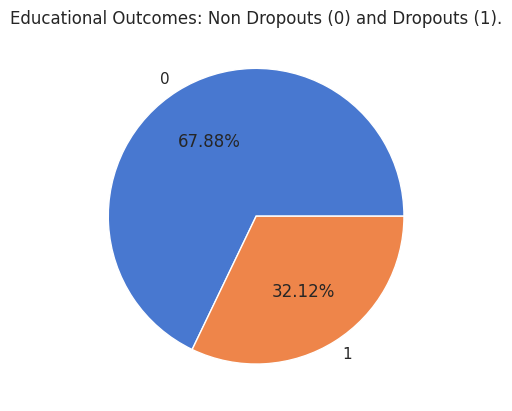

In [63]:
# Visualizing the distribution of Graduates vs. Dropouts vs. Enrolled to understand the performance baseline

categories_counts = df['Dropout'].value_counts()
plt.pie(categories_counts.values, labels=categories_counts.index, autopct='%1.2f%%')

plt.title('Educational Outcomes: Non Dropouts (0) and Dropouts (1).')
plt.show()

#### Comprehensive Analysis of Predictors Influencing Dropout Status
This section conducts an in-depth analysis of various factors to understand their influence on Dropout Status in the academic environment:

* Correlation matrix heatmaps explain the complex relationships between various variables.
* Bar graphs of the top 10 features with the highest correlation to Dropout Status allow immediate identification of the most significant predictors.
* Factor Ranking heat maps rank these features and also provide an aesthetically pleasing and organized visualization.

Collectively, these visual analysis tools create a powerful narrative about the determinants of student success and retention in educational institutions.


#### Feature Correlation Insight
The heatmap's correlation matrix provides a detailed view into the relationships between various factors and their impact on Dropout Status. 

In [ ]:
# Analyzing the correlation between various features with a heatmap to identify potential predictors for Dropout Status

plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


#### Identifying Key Predictors for Dropout Status
This section presents a statistical analysis aimed at determining the top 10 features that are most strongly correlated with Dropout Status. By calculating the correlation of all features with Dropout Status and selecting the ten features with the highest absolute values, we obtained a clear ranking.

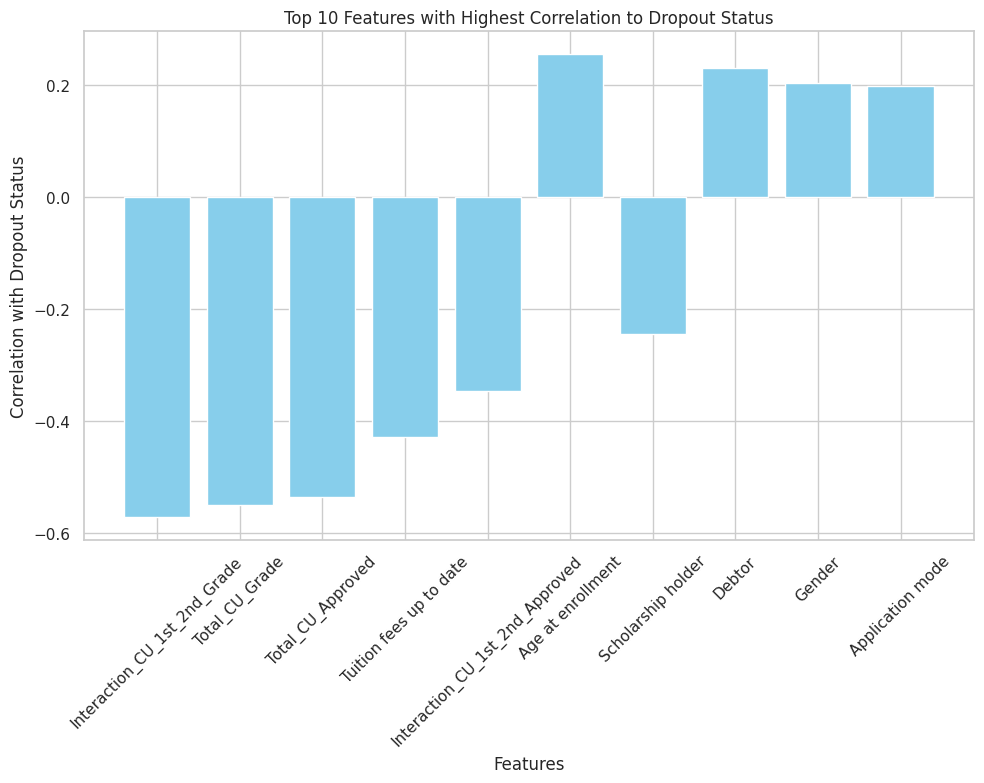

In [65]:
# Recalculating correlations to ensure consistency
correlations = df.corr()['Dropout'].drop('Dropout')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Dropout Status')
plt.title('Top 10 Features with Highest Correlation to Dropout Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Factors Ranker Visualization
The Factors Ranker heatmap offers a visually impactful and ordered representation of the correlation between Dropout Status and selected features. It ranks these features by their correlation strength, from the highest to the lowest. 

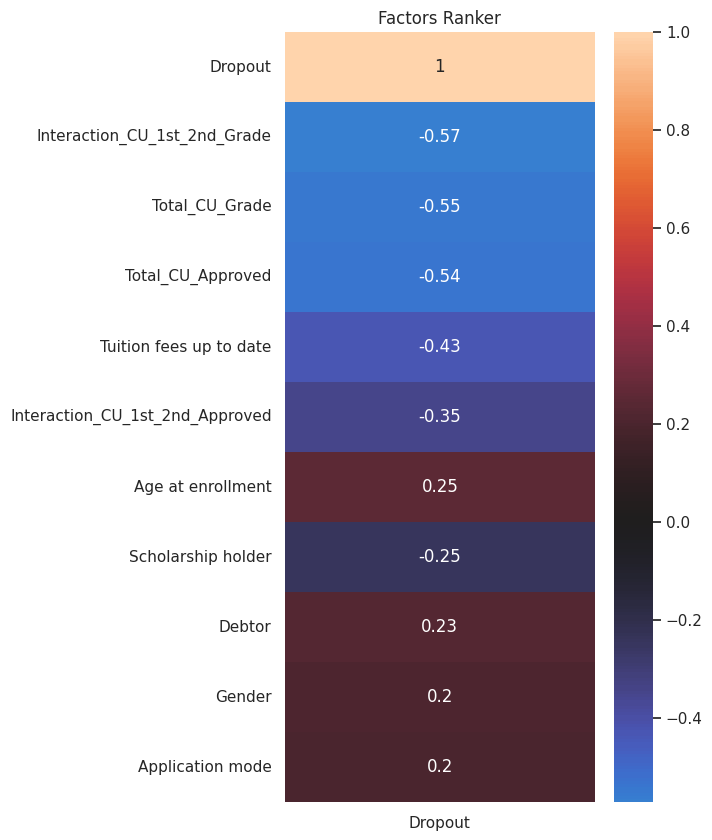

In [66]:
# Creating a new DataFrame with only the top 10 features and 'Dropout Status'
top_10_df = df[top_10_features.to_list() + ['Dropout']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Dropout']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Dropout', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

### Academic Performance and Its Impact on Dropout Status¶
After exploring a range of factors affecting Dropout status, this section visually dissect the effects of curricular unit completion and grades on the academic statuses of students, now considering the newly engineered features that reflect their combined effects.

#### Impact of Interaction Between 1st and 2nd Semester Grades on Dropout Status
The first bar chart exhibits a clear upward trend in the interaction of grades from the first and second semesters, illustrates that Dropout students have significantly lower combined grades than Non Dropouts, suggesting that not just individual semester performance but the combined performance over semesters is a strong indicator of Dropout.

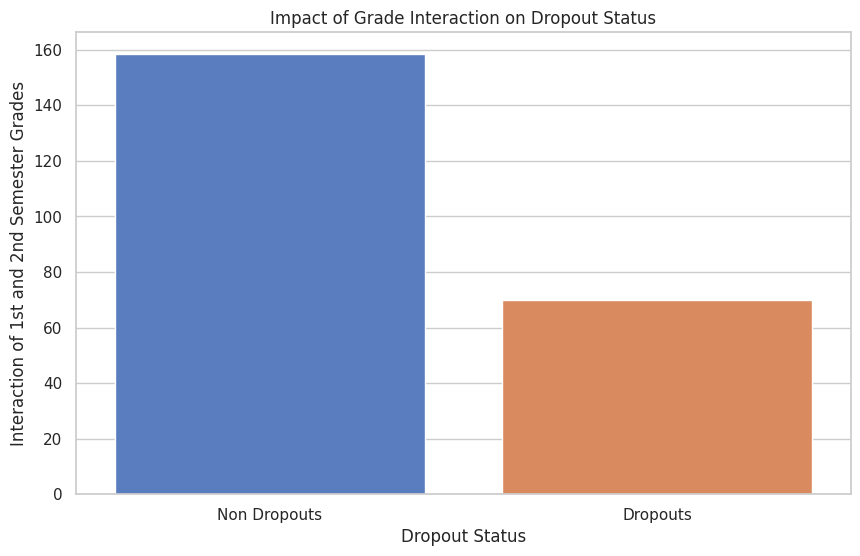

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Dropout', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1], ['Non Dropouts', 'Dropouts'])
plt.xlabel('Dropout Status')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Dropout Status')
plt.show()

#### Impact of Total Approved Curricular Units on Dropout Status
The second chart shows the effect of the aggregated measure of curricular units approved in both semesters. The dropout student’s Total CU approved are less than half of the non dropouts, indicating this feature has significant impact on dropout status, similar to the interaction feature.

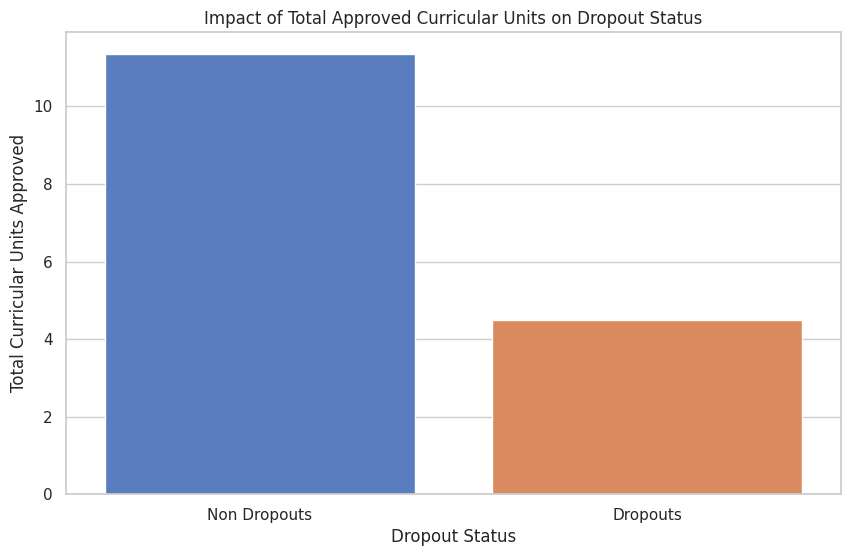

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Dropout', y='Total_CU_Approved', data=df, errorbar=None)
plt.xticks([0, 1], ['Non Dropouts', 'Dropouts'])
plt.xlabel('Dropout Status')
plt.ylabel('Total Curricular Units Approved')
plt.title('Impact of Total Approved Curricular Units on Dropout Status')
plt.show()

The consistent upward trends observed in these visual analyses support the importance of both cumulative achievements, such as the total number of approved curricular units, and the synergy between semesters' grades in the academic trajectory of students.

### Assessing the Role of Financial Status in Educational Progress
This section delves into the specific role of financial conditions on educational achievement. Through the analysis of debt, scholarship provision, and tuition fee payment status, we aim to understand the fiscal influences that may affect a student's academic journey.

#### Debt and Educational Trajectories
The first stacked bar chart presents a striking visual contrast between students with and without debt across two dropout status categories: dropout and non dropout. The proportion of students who drop out is noticeably larger within the indebted group, suggesting a detrimental effect of financial obligations on educational continuity.

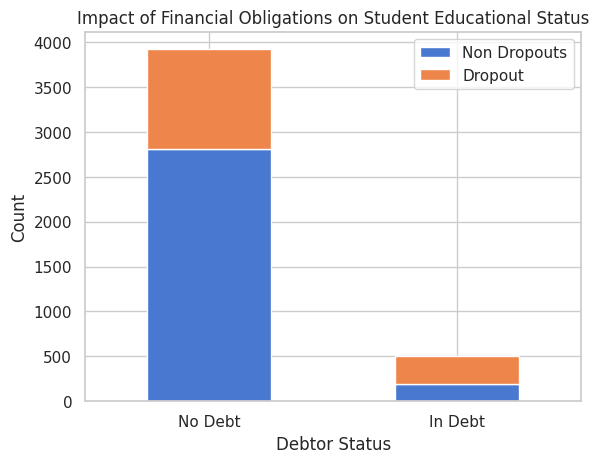

In [69]:
# Mapping Dropout Status numerical labels to descriptive labels for the legend
student_status_labels = {0: 'Non Dropouts', 1: 'Dropout'}

# Mapping numerical labels to descriptive labels for Debtor status
debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}

# Visualizing the impact of student debt on educational status
grouped = df.groupby(['Debtor', 'Dropout']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

#### Scholarships as a Support System
Next, the impact of scholarships is examined through another stacked bar chart. The distribution clearly shows a majority of dropout student comes from group with no scholarship, which could indicate that financial support is a significant factor in helping students complete their education without dropped out.

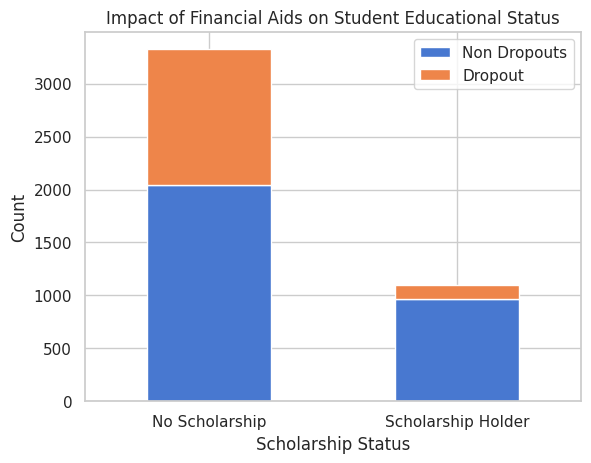

In [70]:
# Mapping numerical labels to descriptive labels for Scholarship status
scholarship_status_labels = {0: 'No Scholarship', 1: 'Scholarship Holder'}

# Visualizing the impact of scholarships on educational status
grouped = df.groupby(['Scholarship holder', 'Dropout']).size().unstack()
grouped.rename(index=scholarship_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.title('Impact of Financial Aids on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

#### Tuition Fees: A Predictive Financial Indicator¶
The final analysis focuses on the correlation between the status of tuition fee payments and student outcomes. The graph suggests that students with outstanding tuition fees have a higher likelihood of dropping out, making this factor a potent predictor of educational discontinuation.

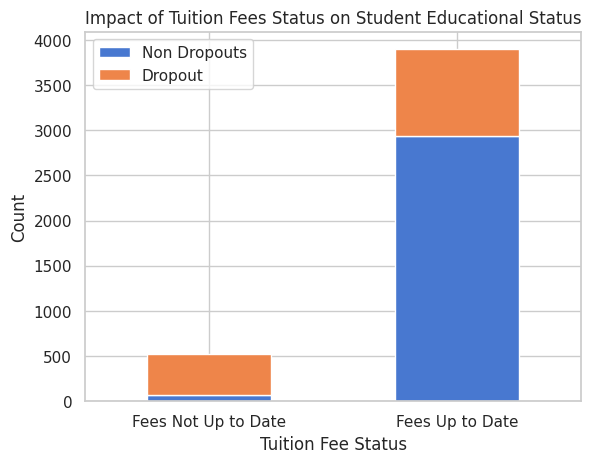

In [71]:
# Mapping numerical labels to descriptive labels for Tuition Fee status
tuition_fee_status_labels = {0: 'Fees Not Up to Date', 1: 'Fees Up to Date'}

# Visualizing the impact of tuition fees status on educational outcomes
grouped = df.groupby(['Tuition fees up to date', 'Dropout']).size().unstack()
grouped.rename(index=tuition_fee_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fee Status')
plt.ylabel('Count')
plt.title('Impact of Tuition Fees Status on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

In these analyses, it is evident that financial status not only affects the present educational standing but also has long-term implications on a student's educational trajectory. Addressing these financial challenges could be crucial in supporting student retention and success.

### The Interplay of Age and Gender in Academic Progression
This section investigates the impact of demographic factors, specifically age and gender, on student academic status. By analyzing the age distribution at enrollment and the relationship between age and Dropout status, along with the gender dynamics, we aim to uncover patterns that could be influential in educational attainment.

#### Age Distribution Analysis
The histogram illustrates the age distribution at the time of enrollment among the student population. With most students enrolling between the ages of approximately 18 to 22, a skewed distribution is evident, highlighting a typical college-age demographic. This trend diminishes significantly with increasing age, suggesting a traditional focus on younger students within the academic system.

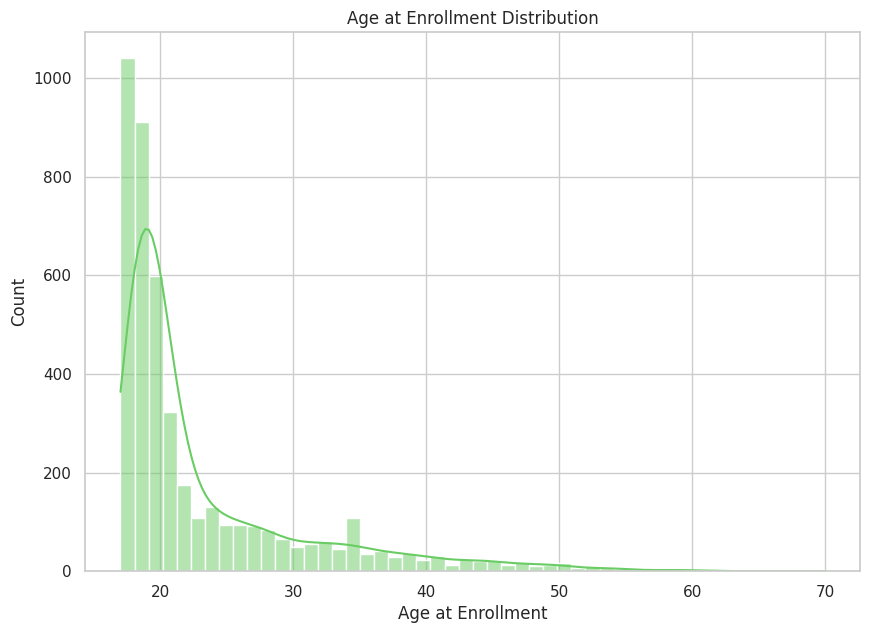

In [72]:
# Converting inf to NaN in the 'Age at enrollment' column
df['Age at enrollment'] = df['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

# Ignoring FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 7))
ax = sns.histplot(df['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

#### Dynamics of Age in Student Outcomes
The box plot showcases the age distribution in relation to dropout status, categorizing students into dropouts and non-dropped. Non-dropped students tend to be younger, with a narrower age range suggesting a more uniform path to completion. In contrast, dropouts have a wider age range, indicating that dropping out affects a broader demographic.

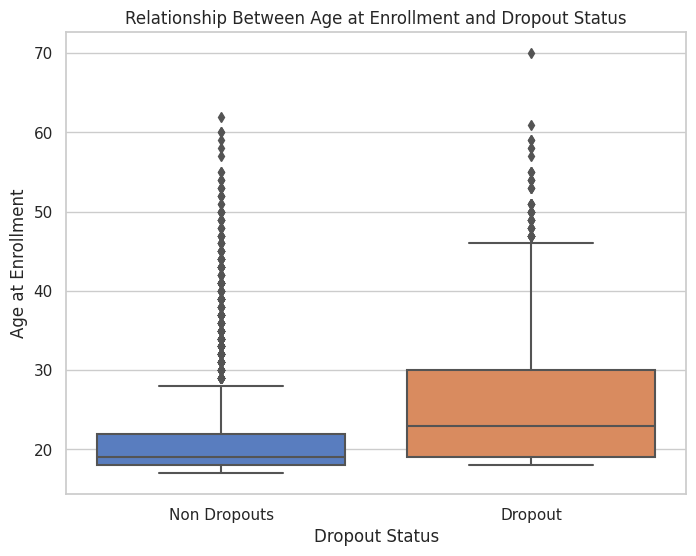

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dropout', y='Age at enrollment', data=df)
plt.xticks([0, 1], ['Non Dropouts', 'Dropout'])
plt.xlabel('Dropout Status')
plt.ylabel('Age at Enrollment')
plt.title('Relationship Between Age at Enrollment and Dropout Status')
plt.show()

#### Gender's Influence on Educational Trajectories
The count plot examines the distribution of dropout status by gender, revealing that while the total number of males and females may be similar, their academic statuses differ. This visual suggests potential gender-based disparities in academic persistence or success that warrant further exploration.

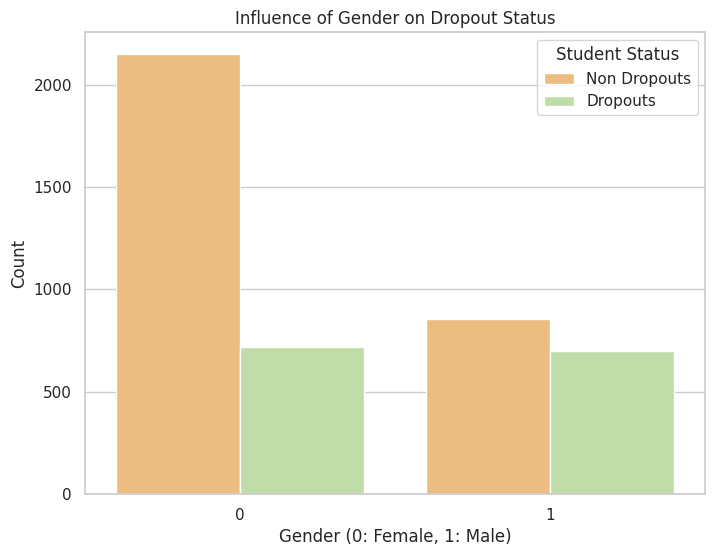

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Dropout', data=df, palette='Spectral')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Student Status', labels=['Non Dropouts', 'Dropouts'])
plt.title('Influence of Gender on Dropout Status')
plt.show()

Incorporating these findings into academic support strategies could potentially help tailor interventions and support services to the specific needs and challenges within the student body.

## Model Using Machine Learning
<a id=section-4></a>

In this section, we are going to construct a number of predictive modelling workflow, encompassing data collection, model selection, data training, data evaluation, and refinement. The main objective is to predict dropout student which are Dropout and Non-Dropped based on various features. We will see which model will be the most accurate one to do the task and guide us better for the decision-making process.

#### Dataset Preparation for the Predictive Modeling

Here, we are going to split the dataset into features(X) and the target variable (Y), where the target variable is the `dropout status` of students. Afterward, we will divide the dataset into training and testing sets to work on the model's performance on unseen data. 

In [75]:
## import the train_test_split to split the data
from sklearn.model_selection import train_test_split

X = df.drop('Dropout', axis = 1)
y = df['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### PCA for Dimension Reduction

As one of the statistical techniques, the primary goal of PCA (Principal Component Analysis) is to reduce the dimensionality of a dataset while preserving most of the variation of the data. It achieves this by transforming the original varibles into a new set of varibles called principal components, which are linear combinations of the original variables. The aim is to select a minimal number of components that capture the maximum information about the dataset

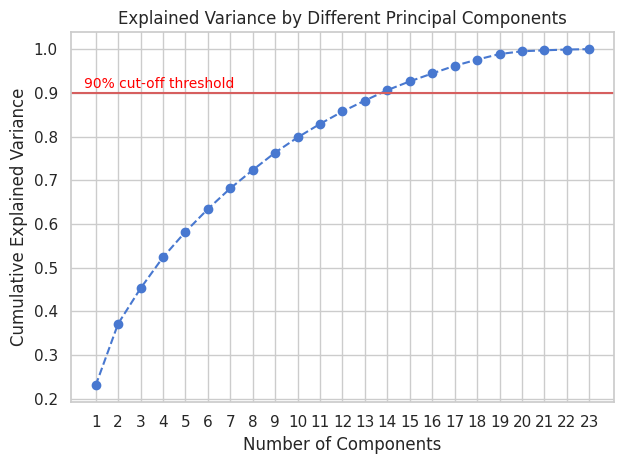

In [76]:
# importing important libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fitting the training PCA
pca = PCA().fit(X_train_scaled)

# Visualizing the cumulative explained variance to determine the number of components needed
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Drawing a horizontal line at 90% cumulative explained variance
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.91, '90% cut-off threshold', color = 'red', fontsize=10)

plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))

plt.grid(True)
plt.tight_layout()
plt.show()


#### Learning Process for the Model Evaluation

Here, we are going to cconfiguring pipeline, hyperparameteers, and learning curves for this section. We will also set up various machine learning to be used, including `Random Forest`, `Logistic Regression`, `SVM`, and `KNN` with some respective pipelines preprocessing steps (SMOTE for imbalanced classes, PCA as we mentioned previously. scaling) and model-specific hyperparameters (parameters that are set prior to the training process of a machine learning model).

**Notes** 
1. SVM is known for its ability to handle high-dimensional data, effectiveness in dealing with complex datasets, and robustness against overfitting when properly tuned. In regression tasks, SVM can be used to predict continuous values by fitting a hyperplane that best fits the data points, aiming to minimize the error between the predicted and actual values. Since, we are having a high-dimensional data which compreises more than 10 features, thus this model is very suitable for our case. Moreover, its ability to hinder the overfit also makes SVM has a good score either in the training and testing dataets.

2. Logistic regression is a statistical method used for binary classification tasks, where the outcome variable has only two possible outcomes (here is Dropped out and non-Dropped out in our final models). It models the probability of the input belonging to a particular class using the logistic function (sigmoid function [$\sigma(x)$]). Despite, it can not find some complex non-linear correlations as SVM do previously, it can still provide valuable insights into the Random Forest is an ensemble learning method used for classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees. Since it is relationships between student attributes and dropout risk. Moreover, it is one of the efficient and simplest method to be found out later.

3. K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric method, meaning it does not make assumptions about the underlying data distribution. Instead, KNN makes predictions based on the majority class or average value of the K nearest neighbors in the feature space. This method is very good on handling the imbalanced data that we have currently, since we know that the percentage of students based on its dropout status is quite imbalanced

4. Random Forest is an ensemble learning method used for classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (for classification) or the mean prediction (for regression) of the individual trees. Since it is an ensemble learning, it may give us a high accurate data eventhough the basic is only trees, and there is also no-assumption on making the models that indicates that this model is taking care of the things that we used, which is good for high-dimensional data.

SMOTE stands for Synthetic Minority Over-sampling Technique. It is a popular method used to address class imbalance in machine learning datasets, particularly in classification tasks where one class (the minority class) is significantly underrepresented compared to the other classes (the majority class or classes).

In [77]:
# importing important libraries such as the SMOTE, Random Forest, etc

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from scipy.stats import randint, uniform
from sklearn.model_selection import learning_curve

# configuring different machine learning models with hyperparameters and pipelines.

models= {
    'Random Forest': {
            'pipeline': ImbPipeline(steps=[
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('model', RandomForestClassifier(random_state=42))
            ]),
            'params': {
                'model__n_estimators': [100, 125],
                'model__max_depth': [3, 4],
                'model__min_samples_split': [4, 6],
                'model__min_samples_leaf': [2, 3],
                'model__max_features': ['log2'],
            }
        },
        'Logistic Regression': {
            'pipeline': ImbPipeline(steps=[
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('model', LogisticRegression(random_state=42))
            ]),
            'params': {
                'model__C': [0.005, 0.01, 0.05],
                'model__penalty': ['l1', 'l2'],
                'model__solver': ['liblinear'],
            }
        },
        'SVM': {
            'pipeline': ImbPipeline(steps=[
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('model', SVC(probability=True, random_state=42))
            ]),
            'params': {
                'model__C': uniform(0.5, 2),
                'model__kernel': ['rbf', 'linear'],
            }
        },
        'KNN': {
            'pipeline': ImbPipeline(steps=[
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('model', KNeighborsClassifier())
            ]),
            'params': {
                'model__n_neighbors': randint(8, 14),
                'model__weights': ['uniform'],
        }
    }
}

#Now we are going to configure the learning curves to identify if the models are underfitting or overfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

#### Optimizing Model Parameters using Hyperparameter Tuning

This step utilizes RandomizedSearchCV for hyperparameter tuning across defined machine learning models. This method will be efficient when the hyperparameter space for evaluation which is happening in our case. It will methodically explore a subset of hyperparameter combinations to find the most effective ones, determined by their accuracy in cross-validation. Cross-validation accuracy is used for preventing our model to be overfit and enhance the prediction accuracy.

Starting search for: Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Random Forest: 0.8427
Training Score for Random Forest: 0.8626
Search completed for Random Forest. Time taken: 0:00:27
Best parameters for Random Forest: {'model__n_estimators': 100, 'model__min_samples_split': 6, 'model__min_samples_leaf': 3, 'model__max_features': 'log2', 'model__max_depth': 4}


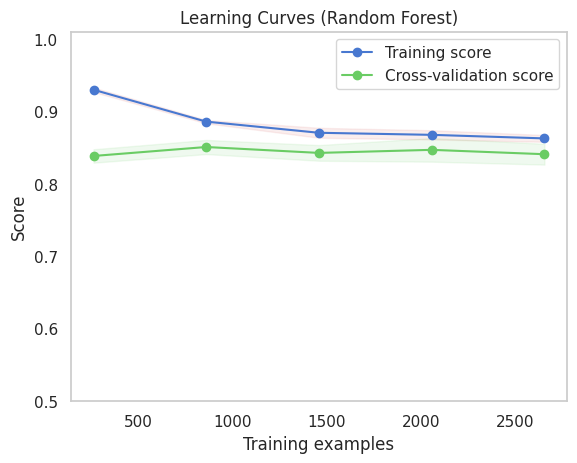

Starting search for: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Logistic Regression: 0.8514
Training Score for Logistic Regression: 0.8526
Search completed for Logistic Regression. Time taken: 0:00:03
Best parameters for Logistic Regression: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 0.005}


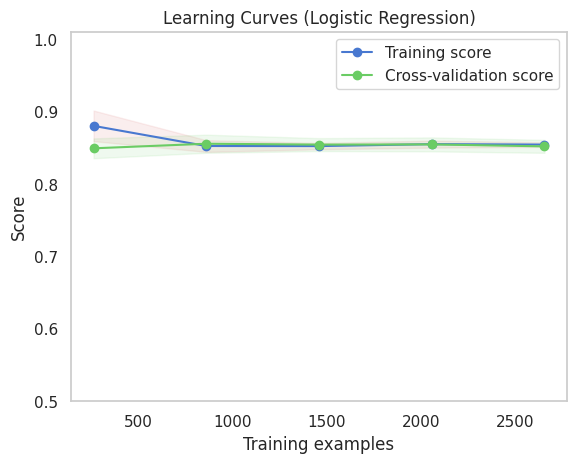

Starting search for: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for SVM: 0.8493
Training Score for SVM: 0.8532
Search completed for SVM. Time taken: 0:01:05
Best parameters for SVM: {'model__C': 0.8668695797323276, 'model__kernel': 'linear'}


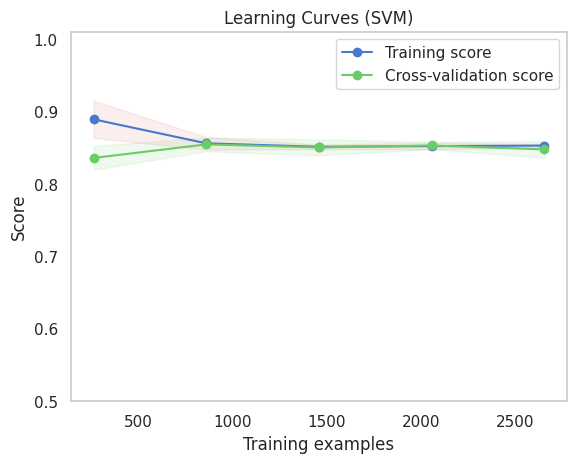

Starting search for: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for KNN: 0.8234
Training Score for KNN: 0.8659
Search completed for KNN. Time taken: 0:00:04
Best parameters for KNN: {'model__n_neighbors': 12, 'model__weights': 'uniform'}


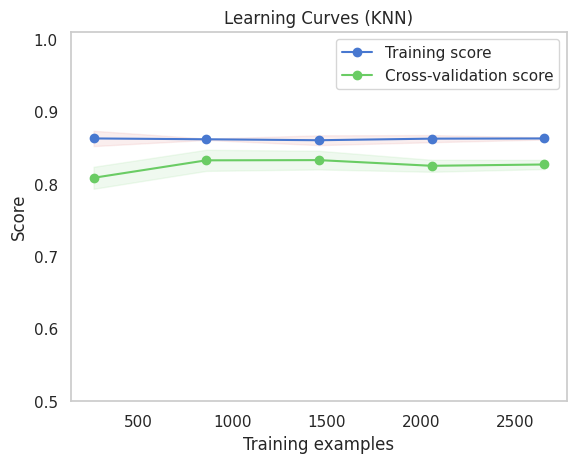

Total time for all model searches: 0:02:03


In [78]:
from sklearn.model_selection import RandomizedSearchCV
import time
from datetime import timedelta

best_models = {}
start_time = time.time()

# Performing RandomizedSearchCV
for name, config in models.items():
    print(f"Starting search for: {name}")
    search_start_time = time.time()
    
    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=6, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")
    
    # Comparing training set performance to the best CV score
    training_score = search.score(X_train, y_train)
    print(f"Training Score for {name}: {training_score:.4f}")
    
    elapsed_time = int(time.time() - search_start_time)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time))}")
    
    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")
    
    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=4)
    
overall_time = int(time.time() - start_time)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time))}")

During training, KNN (K-Nearest Neighbour) demonstrates remarkable accuracy in determining student statuses, achieving an impressive score of `0.8659`. However, when tested on unseen data, it becomes evident that Logistic Regression outperforms SVM in predictive accuracy, with `0.8514`. Despite KNN's initial promise, the comprehensive evaluation of testing data reveals Logistic Regression as the superior model for predicting student statuses.

#### Combining Multiple Models to Hinder Complexness

An ensemble model aggregates forecasts from several machine learning models through a VotingClassifier employing a soft voting strategy. This method frequently enhances performance by mitigating overfitting and enhancing the reliability of predictions.


In [79]:
from sklearn.ensemble import VotingClassifier

mix = VotingClassifier(estimators = [(name, model)
                                    for name, model in best_models.items()], voting = 'soft')

mix.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               RandomForestClassifier(max_depth=4,
                                                                      max_features='log2',
                                                                      min_samples_leaf=3,
                                                                      min_samples_split=6,
                                                                      random_state=42))])),
                             ('Logistic Regression',
                              Pipeline(steps=[('scaler', StandardS...
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               SVC(C=0.8668695797323276,
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=12))]))],
                 voting='soft')

#### Using the Ensemble Model's Performance

Now, we are going to evaluate the ensemble that we have configured out to find its accuracy, confusion matrix, and classification report. It will provide a comprehensive view of the model's capabilities and areas for improvement.

Ensemble (The Mixture) model accuracy: 0.8291


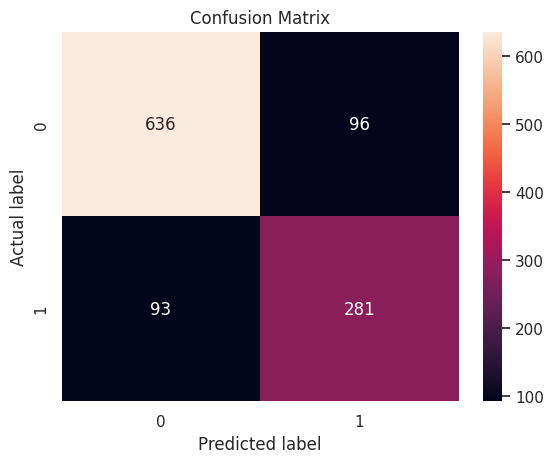

Test Accuracy: 0.8291
Training Accuracy: 0.8677

              precision    recall  f1-score   support

 Non Dropout       0.87      0.87      0.87       732
     Dropout       0.75      0.75      0.75       374

    accuracy                           0.83      1106
   macro avg       0.81      0.81      0.81      1106
weighted avg       0.83      0.83      0.83      1106



In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluating ensemble model performance on the test set
y_pred = mix.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble (The Mixture) model accuracy: {accuracy:.4f}")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Overfitting Check
train_accuracy = mix.score(X_train, y_train)
test_accuracy = mix.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}\n")

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Non Dropout', 'Dropout']))

#### ROC Curves for Assessing Model Discrimination

ROC curves for individual classes assess the discriminatory power of the ensemble model, with the area under the curve (AUC) serving as a performance metric. Elevated AUC values imply superior model sensitivity and specificity, indicating its efficacy in distinguishing between different classes.

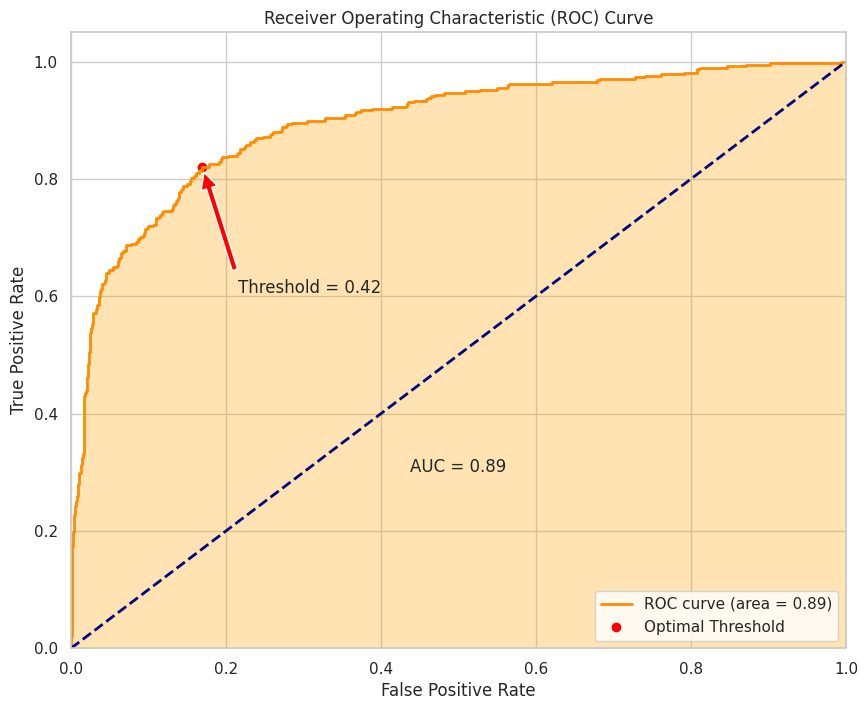

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_prob_binary = mix.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add gradient color
gradient = [(0, '#FFFFFF'), (0.5, '#FED8B1'), (1, '#FF4500')]
plt.fill_between(fpr, tpr, color='orange', alpha=0.3)

# Add marker for optimal threshold
optimal_idx = np.argmax(tpr - fpr)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Optimal Threshold')

# Add grid lines
plt.grid(True)

# Add annotations
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=12, ha='center')
plt.annotate(f'Threshold = {thresholds[optimal_idx]:.2f}',
             xy=(fpr[optimal_idx], tpr[optimal_idx]), xycoords='data',
             xytext=(0.4, 0.6), textcoords='axes fraction',
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='right', verticalalignment='top')

# Customize labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Some keypoints to be taken: 
1. The Area of ROC is 0.89 which means now the data is more discriminated, and it will be easier for the model to find some pattern to determine true or false, since the feature given is more easily differentiated.
2. This high ROC also states that the tendency for the model to get True Positive Rate is higher than False Positive Rate, which indicates that our ensembled model is one of the accurate models that can be used to predict the Dropout Status

#### Exploring Data Distribution and Model Predictions in Reduced Dimensional Space

Lastly, to evaluate the accuracy in this reduced dimensional space, we utilize t-SNE, which is a powerful tool for visualizing high-dimensional datasets, as it reduces the dimensionality while preserving local structures. By projecting ensemble model predictions and actual student statuses into a 2D space, t-SNE uncovers intricate patterns, clusters, or areas of confusion, providing deeper insights into the underlying data dynamics. This visualization technique enables a more intuitive understanding of complex relationships and facilitates the identification of potential areas for model improvement or refinement.

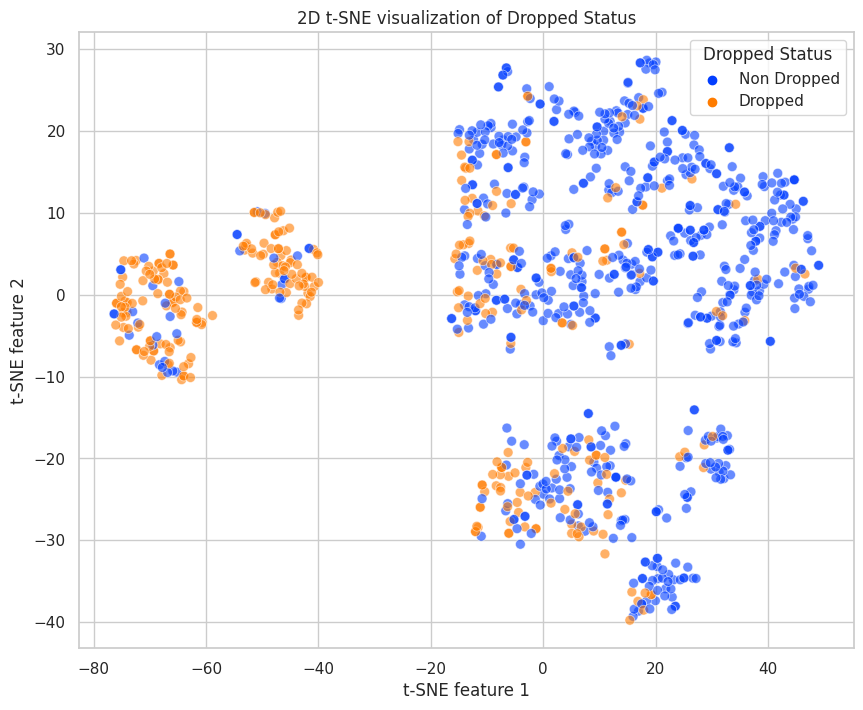

In [82]:
from sklearn.manifold import TSNE
from sklearn.utils import resample

# Subsampling the data
X_sampled, y_sampled = resample(X_train, y_train, n_samples=1000, stratify=y_train, random_state=42)

# Running t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_reduced = tsne.fit_transform(X_sampled)

# Predicting with the ensemble model
y_pred = mix.predict(X_sampled)

# Replacing numeric labels with string labels
label_names = {0: 'Non Dropped',  1:'Dropped'}
y_sampled_named = y_sampled.map(label_names)  

# Adjusting the color palette to have clearer distinctions
palette = sns.color_palette("bright", len(label_names))

# Modifying the legend mapping for numero class names
legend_labels = {v: k for k, v in label_names.items()}
# 2D t-SNE Plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_sampled.map(label_names),
                palette=palette, alpha=0.6, s=50)

plt.title('2D t-SNE visualization of Dropped Status')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Dropped Status')
plt.show()

From the visualization above, it is seen clearly that dropped students represented by orange points are being clustered into specific space on the top left around (-50,0) in terms of (t-SNE feature 1, t-SNE feature 2), and on the other side, non-dropped students are being represented by blue points distributed evenly on the right part of the coordinates. Analyzing this clustering patter, that means it is easy for the model to differentiate between these two features in binary classifications. 

## Evaluation of the Predictions
<a id=section-6></a>

Let's dive into the comparison of the best individual models optimized (by hyperparameter tuning) for student dropout prediction. It's worth noting that while the KNN (K-Nearest Neighbor) merges as the most effective model for training data, the Logistic Regression shines as the superior choice for testing data within the refined datasets.

The ranking sequence from the highest accuracy to the lowest in the refined data (Training Data)
1. KNN ($0.8659$)
2. Random Forest ($0.8626$)
3. SVM ($0.8532$)
4. Logistic Regression ($0.8526$)

The ranking sequence from the highest accuracy to the lowest in the refined data (Testing Data) [**IMPORTANT**]
1. Logistic Regression($0.8514$)
2. SVM ($0.8493$)
3. Random Forest ($0.8427$)
4. KNN ($0.8234$)

Evaluating the accuracy of training and testing datasets, we have found out that Logistic Regression has the smallest margin between training and testing data, that means it will be the best one to be chosen individually. Nevertheless, you may also choose either SVM or Random Forest, since it also only gives a little difference on their training and testing data. While, KNN gives you a best number for Training data, it only gives you poor number on the testing set, this indicates the model is inaccurate.

**In fact, we are not going to use those 4 models, but we will implement the ensemble model, which actually will be discussed in the conclusion later.**

## Conclusion and Implementation
<a id=section-7></a>

#### Conclusion-1 (Impactful Features on Determining the Dropout Status)

Based on our EDA(Exploratory Data Analysis), we have found out that there are some factors that influentially contributing to `Dropout Status`, which are: 

* Academic Performance 
1. `Interaction_CU_1st_2nd_Grade` ($0.57$)
2. `Total_CU_Approved` ($0.55$)
3. `Total_CU_Grade` ($0.54$)
4. `Interaction_CU_1st_2nd_Approved` ($0.35$)
5. `Application Mode` ($0.2$)

* Economic Factors 
1. `Tuition fees up to date` ($0.43$)
2. `Scholarship holder` ($0.25$)
3. `Debtor` ($0.23$)

* Demographic Analysis 
1. `Age at Enrollment` ($0.25$)
2. `Gender` ($0.2$)

Notice that academic perfromace is the most affecting factors to the Dropout Status features, thus school or government needs to give more notice on this sectors to reduce the chance of one students to be dropped out. Nevertheless, economic factors often burden the students' progress on their study, this is why offers of scholarship will be very helpful to those students. Finally, the micro-factor which is demographic analysis, includes age at enrollment and gender also makes some student just feel that they are not appropiate on that particular school and force them to dropout.

#### Conclusion-2 (Machine Learning on Making the Model)

Upon closer examination of our testing data, it became evident that Random Forest, Support Vector Machine (SVM), and Logistic Regression exhibited comparable accuracies in predicting the target variable. In the training data itself, we have found out that those 3 are also having quite similar number. Eventhough Logistic Regression stands as the lowest, it only has minor difference between the training and testing sets. Consequently, for optimal prediction, we strongly advocate leveraging the Logistic Regression model when tasked with predicting the dropout status feature, ensuring the delivery of precise and dependable results

Despite exhibiting marginally lower accuracy compared to individual models, it's noteworthy that the ensemble model harnesses the optimal functions of all four models. This amalgamation ensures reliability in addressing our problem, as it avoids the presumptions inherent in certain models like SVM. Consequently, opting for the ensemble model promises favorable outcomes, regardless of the diverse background features present in the dataset.

#### Conclusion-3 (Further Actions)

Analyzing the factors that we have provided in our dataset, school and goverment can take pre-actions to reduce the numbers of dropout students gradually. Utilizing our recommended Models, which are **Logistic Regression** and **Ensembled Model**, they can predict particular students who has some potential features. These are some suggestions that can be applied to school or governments.

1. Since most of the students have problems regarding its academic matters, such as grades an amount of CUs, school need to set the minimum score that students need to achieve in the preceding semester/education for overloading his CU. This strategy is used to make sure that students who are willing to overload has the capability to do so. If they are not qualified, then school needs to set the hard maximum limit CUs to be taken in one semester.

2. Academic Support Programs: Implementing targeted academic support programs to improve academic performance, such as tutoring services, study groups, or mentorship programs. These initiatives could particularly focus on students with lower academic performance or those at risk of falling behind.

3. Financial Aid and Scholarships: Enhancing financial aid packages and scholarship opportunities to alleviate economic barriers to education. This could include increasing the availability and accessibility of scholarships, grants, and need-based financial aid to ensure that all students have the financial resources to pursue their education without undue financial strain

4. Mental Health and Wellness Services: Increasing access to mental health and wellness services to support student well-being and academic success. This could include expanding counseling services, promoting mental health awareness campaigns, and creating a stigma-free environment where students feel comfortable seeking help when needed

